TASK 3. Regression on the tabular data

You have a dataset (internship_train.csv) that contains 53 anonymized features and a target column.  
Your task is to build model that predicts a target based on the proposed features.   
Please provide predictions for internship_hidden_test.csv file.  
Target metric is RMSE. 

In [38]:
import pandas as pd
import numpy as np

import sklearn.metrics
import autosklearn.regression
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

%matplotlib inline

pd.set_option("display.precision", 2)

Import data from .csv file into pandas DatFrame for data inspection:

In [39]:
df = pd.read_csv("internship_train.csv")

Quick data preview & summary:

In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 54 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       90000 non-null  int64  
 1   1       90000 non-null  int64  
 2   2       90000 non-null  int64  
 3   3       90000 non-null  int64  
 4   4       90000 non-null  int64  
 5   5       90000 non-null  int64  
 6   6       90000 non-null  float64
 7   7       90000 non-null  float64
 8   8       90000 non-null  int64  
 9   9       90000 non-null  int64  
 10  10      90000 non-null  int64  
 11  11      90000 non-null  int64  
 12  12      90000 non-null  int64  
 13  13      90000 non-null  float64
 14  14      90000 non-null  float64
 15  15      90000 non-null  float64
 16  16      90000 non-null  float64
 17  17      90000 non-null  float64
 18  18      90000 non-null  float64
 19  19      90000 non-null  float64
 20  20      90000 non-null  float64
 21  21      90000 non-null  float64
 22

In [41]:
df.nunique()

0           500
1           500
2           500
3           500
4           500
5           500
6           199
7         90000
8             2
9           500
10          500
11          500
12          500
13        90000
14        90000
15        90000
16        90000
17        90000
18        90000
19        90000
20        90000
21        90000
22        90000
23        90000
24        90000
25        90000
26        90000
27        90000
28        90000
29        90000
30        90000
31        90000
32        90000
33        90000
34        90000
35        90000
36        90000
37        90000
38        90000
39        90000
40        90000
41        90000
42        90000
43        90000
44        90000
45        90000
46        90000
47        90000
48        90000
49        90000
50        90000
51        90000
52        90000
target    90000
dtype: int64

In [42]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,90000.0,249.42,144.34,0.00e+00,125.00,250.00,374.00,499.00
1,90000.0,250.24,144.02,0.00e+00,126.00,251.00,375.00,499.00
2,90000.0,248.64,144.11,0.00e+00,124.00,248.00,374.00,499.00
3,90000.0,249.74,144.28,0.00e+00,125.00,250.00,375.00,499.00
4,90000.0,249.44,143.94,0.00e+00,125.00,250.00,373.00,499.00
5,90000.0,249.66,144.33,0.00e+00,124.00,250.00,374.00,499.00
6,90000.0,-0.01,7.04,-9.95e+00,-7.07,0.00,7.00,9.95
7,90000.0,0.50,0.29,1.42e-05,0.25,0.50,0.75,1.00
8,90000.0,0.50,0.50,0.00e+00,0.00,0.00,1.00,1.00
9,90000.0,249.84,144.61,0.00e+00,124.00,250.00,376.00,499.00


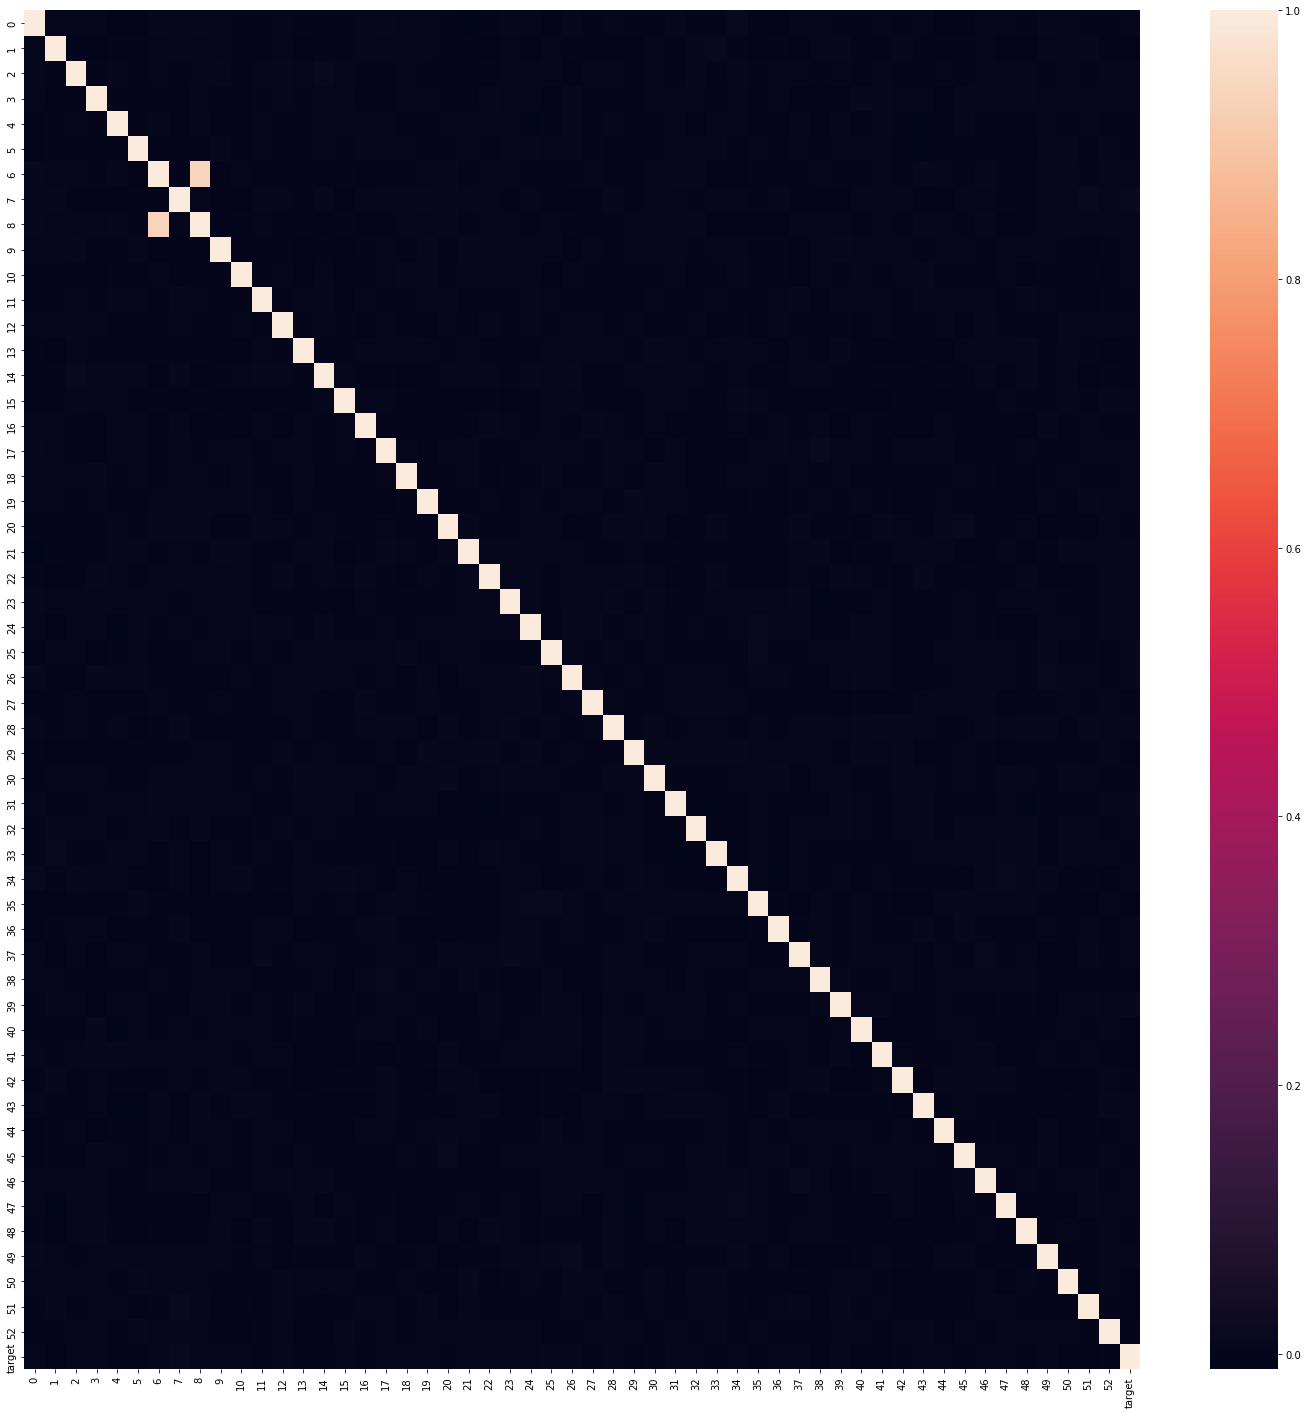

In [43]:
f,ax=plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), fmt='.2f')
plt.show()

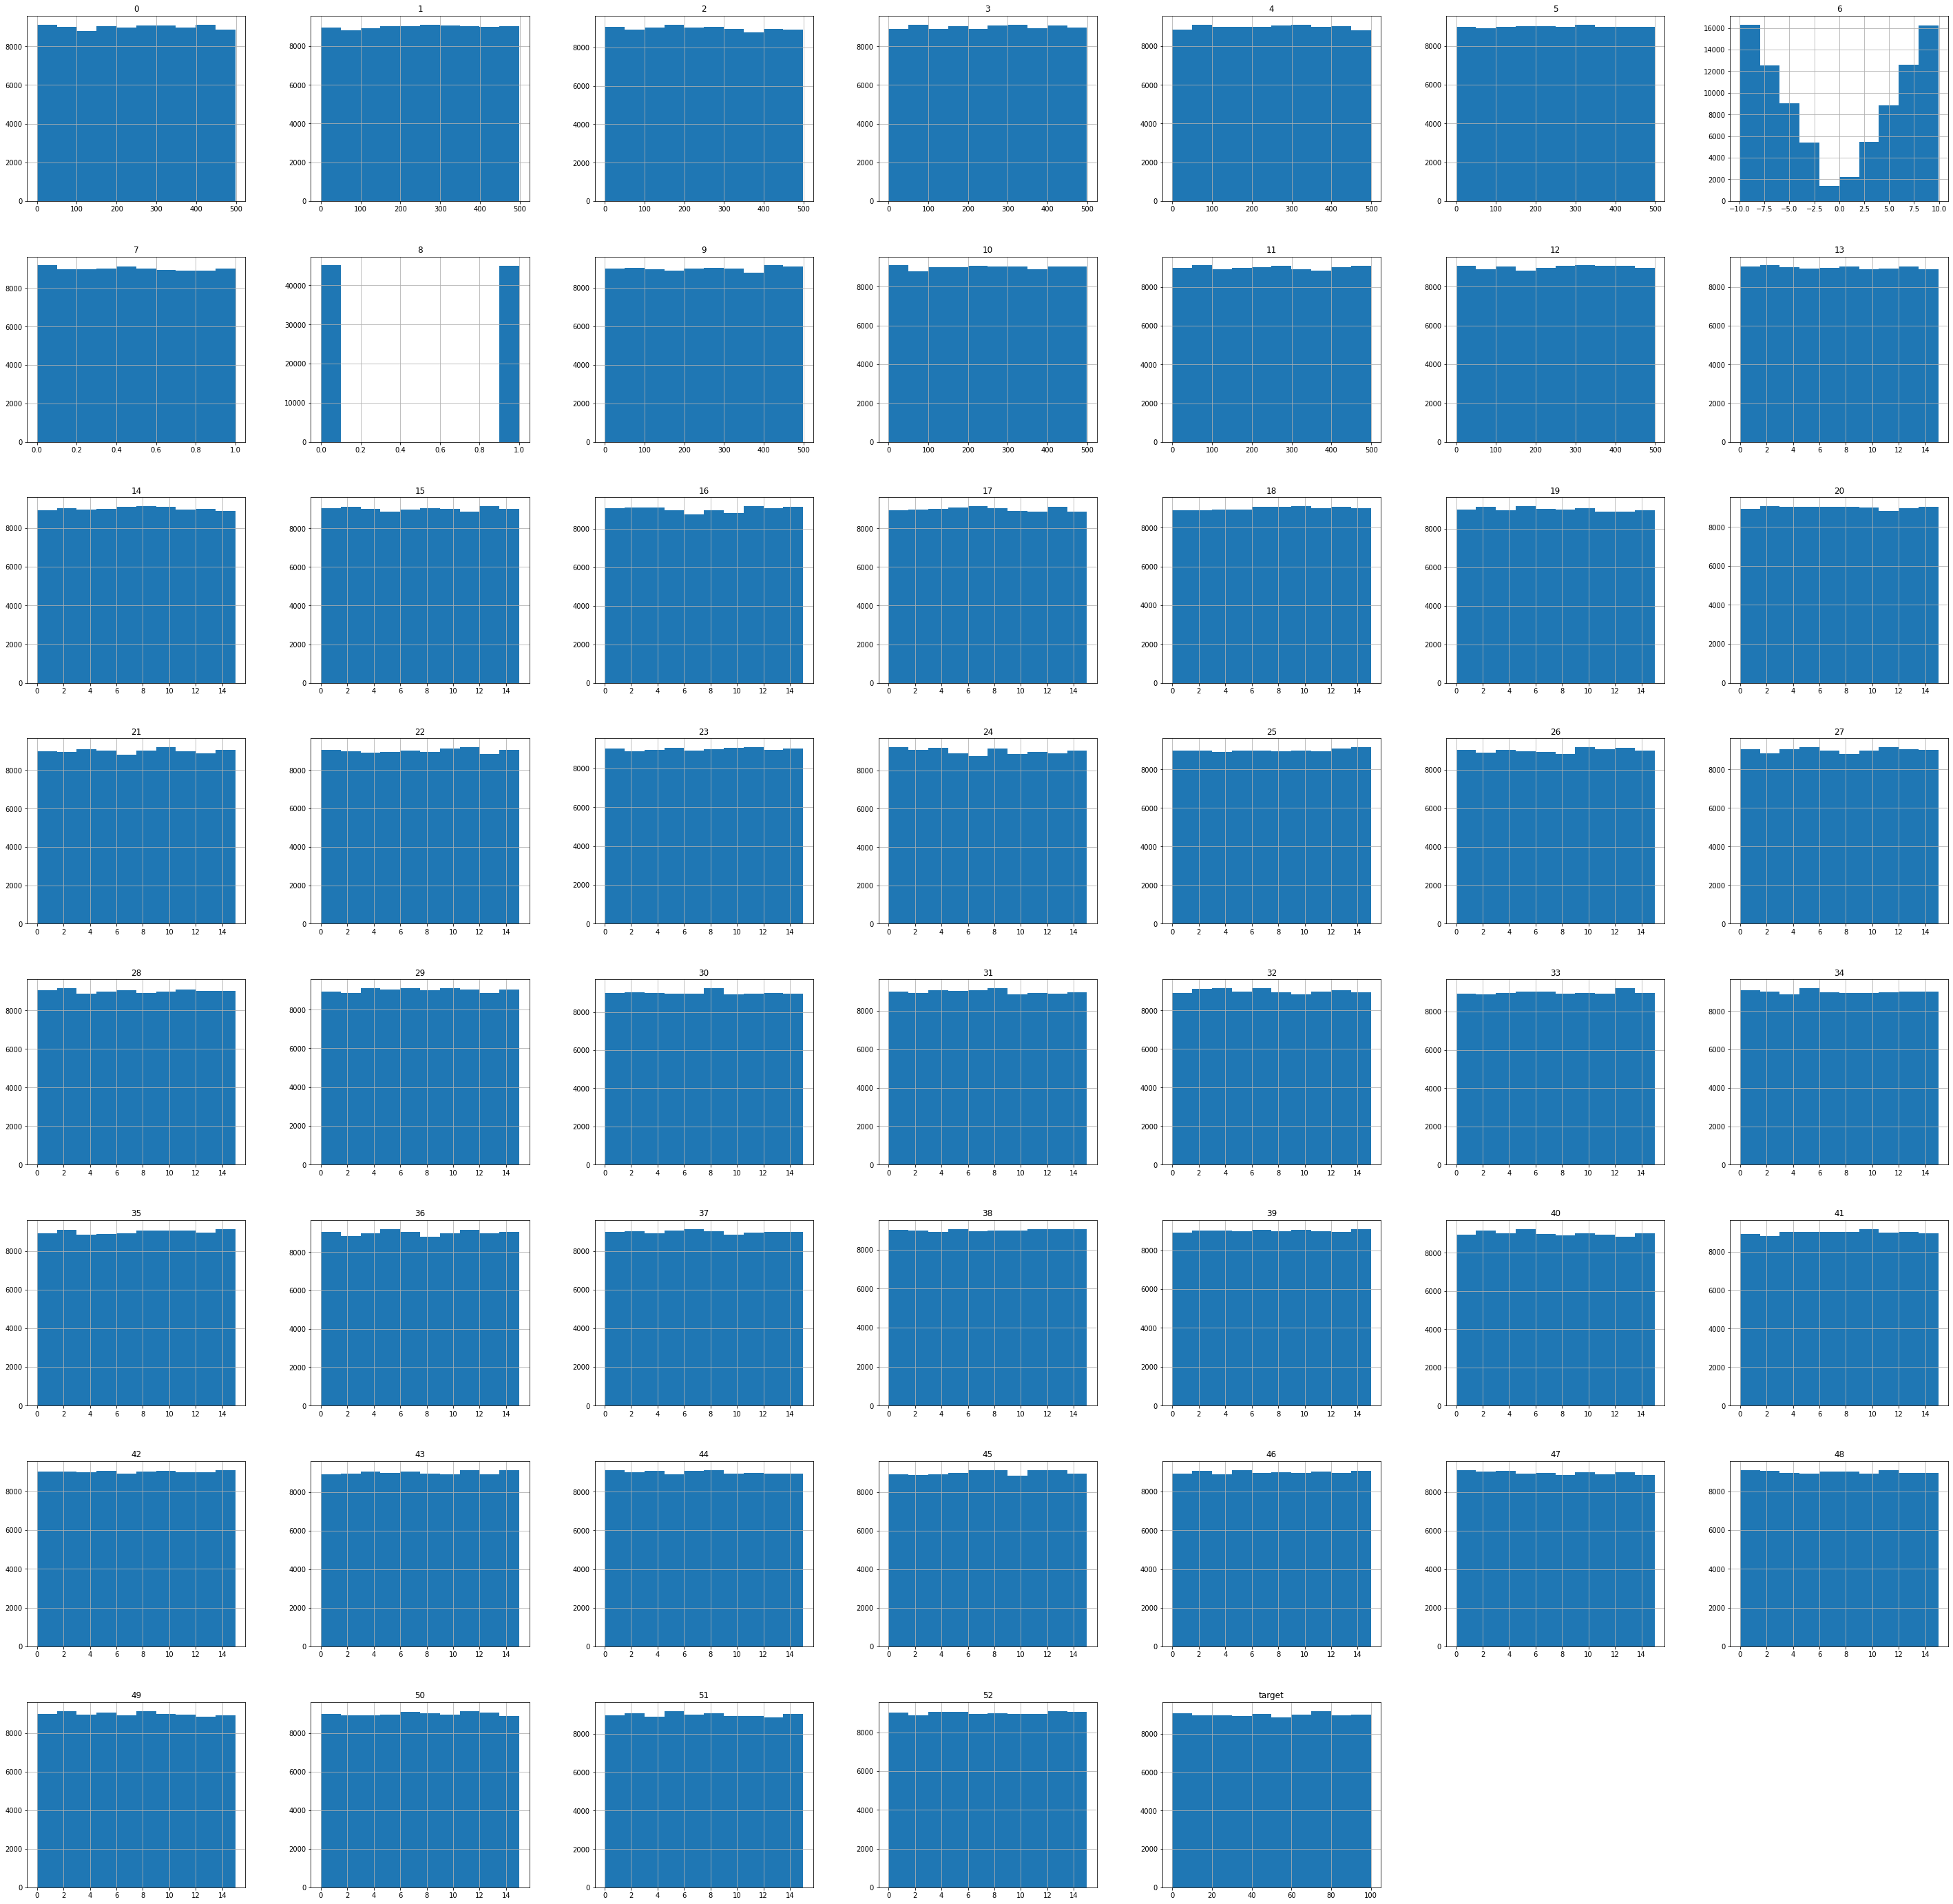

In [44]:
hist = df.hist(bins=10, figsize = (50,50))
plt.show()

Data inspection summary:

- all features but one (feature "6") take positive values, sopme of float, some of int dtype (see info(), describe())
- most features take unique values, some from set of values of cardinality: 2, 199 or 500 (see nunique())
- features "6" and "8" are highly correlated
(they have almost the same effect on the dependent variable, so we could drop one of them)
- all features but "6" and "8" are fairly uniformly distributed, 
        feature "6" has bimodal distribution, 
        feature "8" has Bernoulli distribution


_____________


Define training and test set

In [45]:
y = df.target.to_numpy()
X = df.drop(columns=['target']).to_numpy()

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90000, 53) (90000,)
(81000, 53) (81000,)
(9000, 53) (9000,)


_____________
Find best fitting regression model using Auto-sklearn

In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=600,
        per_run_time_limit=120,
        metric = autosklearn.metrics.root_mean_squared_error,
        # run in paralell 
        n_jobs=-1
)

automl.fit(X_train, y_train, X_test=X_test, y_test=y_test, dataset_name="t3")

In [ ]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: t3
  Metric: root_mean_squared_error
  Best validation score: 0.000001
  Number of target algorithm runs: 51
  Number of successful target algorithm runs: 33
  Number of crashed target algorithm runs: 1
  Number of target algorithms that exceeded the time limit: 8
  Number of target algorithms that exceeded the memory limit: 9



In [ ]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost  duration
model_id                                                           
3            1              1.0  ard_regression  1.49e-06     22.42


In [ ]:
train_predictions = automl.predict(X_train)
print("Train RMSE score:    ", sklearn.metrics.mean_squared_error(y_train, train_predictions, squared = False))
test_predictions = automl.predict(X_test)
print("Test RMSE score:     ", sklearn.metrics.mean_squared_error(y_test, test_predictions, squared = False))

Train RMSE score:     1.4825739438683807e-06
Test RMSE score:      1.4874914009342599e-06


In [ ]:
automl.refit(X, y)

AutoSklearnRegressor(metric=root_mean_squared_error, n_jobs=-1,
                     per_run_time_limit=11520, time_left_for_this_task=28800)

In [ ]:
regressor = 0

for key, value in automl.show_models().items() :
    regressor = automl.show_models()[key]['sklearn_regressor']

print(type(regressor))
print(regressor)

<class 'sklearn.linear_model._bayes.ARDRegression'>
ARDRegression(alpha_1=4.7044575285722365e-05, alpha_2=0.000629863807127318,
              copy_X=False, lambda_1=7.584067704707025e-10,
              lambda_2=3.923255608410879e-08,
              threshold_lambda=4052.403778957396, tol=0.009359388994186051)


Best found regression model:   

Bayesian Automatic Relevance Determination regression, with hyperparameter values (with given short period of runtime == 10min):  
     
alpha_1=4.7044575285722365e-05,   
alpha_2=0.000629863807127318,    
copy_X=False,   
lambda_1=7.584067704707025e-10,    
lambda_2=3.923255608410879e-08,    
threshold_lambda=4052.403778957396,   
tol=0.009359388994186051

(see:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ARDRegression.html)

__________
Make prediction for internship_hidden_test.csv and save to predictions.csv

In [ ]:
X_hidden = pd.read_csv("internship_hidden_test.csv").to_numpy()
y_hidden = automl.predict(X_hidden)
np.savetxt("predictions.csv", y_hidden, delimiter=",")